## XGBoost - BET - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../BET_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precursor               74 non-null     object 
 1   Activator               74 non-null     object 
 2   Activator_carbon_ratio  74 non-null     object 
 3   Activation T (K)        74 non-null     int64  
 4   Pore volume (cm3/g)     74 non-null     float64
 5   BET (m2/g)              74 non-null     float64
 6   BET_2bins_5050          74 non-null     int64  
 7   BET_7426                74 non-null     int64  
 8   synthesis               74 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.3+ KB


In [3]:
df["Activator_carbon_ratio"].unique()

array(['4', '1.5', '0.5', '1', '2', '3', '5', 'none', '6', '2.5', '1.25',
       '8'], dtype=object)

In [4]:
df["Activator_carbon_ratio"] = df['Activator_carbon_ratio'].replace('none', 0)

In [5]:
df["Activator_carbon_ratio"] = pd.to_numeric(df["Activator_carbon_ratio"])

In [6]:
df["Activator_carbon_ratio"].unique()

array([4.  , 1.5 , 0.5 , 1.  , 2.  , 3.  , 5.  , 0.  , 6.  , 2.5 , 1.25,
       8.  ])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precursor               74 non-null     object 
 1   Activator-Ratio         74 non-null     object 
 2   Activator               74 non-null     object 
 3   Activator_carbon_ratio  74 non-null     float64
 4   Activation T (K)        74 non-null     int64  
 5   BET (m2/g)              74 non-null     float64
 6   Pore volume (cm3/g)     74 non-null     float64
 7   synthesis               74 non-null     object 
 8   synthesis_woNAME        74 non-null     object 
 9   2bins_BET               74 non-null     int64  
 10  3bins_BET               74 non-null     int64  
 11  4bins_BET               74 non-null     int64  
 12  5bins_BET               74 non-null     int64  
 13  10bins_BET              74 non-null     int64  
 14  bet_1800                74 non-null     int6

In [8]:
len(df["Precursor"].unique())

31

In [9]:
len(df["Activator"].unique())

10

In [10]:
encoder_precursor = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_precursor = encoder_precursor.fit_transform(df[["Precursor"]])
df = pd.concat([df, one_hot_precursor], axis=1)

In [11]:
encoder_activator = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_activator = encoder_activator.fit_transform(df[["Activator"]])
df = pd.concat([df, one_hot_activator], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precursor                       74 non-null     object 
 1   Activator-Ratio                 74 non-null     object 
 2   Activator                       74 non-null     object 
 3   Activator_carbon_ratio          74 non-null     float64
 4   Activation T (K)                74 non-null     int64  
 5   BET (m2/g)                      74 non-null     float64
 6   Pore volume (cm3/g)             74 non-null     float64
 7   synthesis                       74 non-null     object 
 8   synthesis_woNAME                74 non-null     object 
 9   2bins_BET                       74 non-null     int64  
 10  3bins_BET                       74 non-null     int64  
 11  4bins_BET                       74 non-null     int64  
 12  5bins_BET                       74 non

In [13]:
df.columns[15:56].to_list()

['Precursor_Acai stone',
 'Precursor_Bambo',
 'Precursor_Black locust',
 'Precursor_Catkin',
 'Precursor_Celtuce leaves',
 'Precursor_Chitosan',
 'Precursor_Chrysanthemum tea',
 'Precursor_Coconut shell',
 'Precursor_Coffee grounds',
 'Precursor_Cork',
 'Precursor_Crab shell',
 'Precursor_Empty fruit bunch',
 'Precursor_Garlic peel',
 'Precursor_Lignin Waste',
 'Precursor_Olive stone',
 'Precursor_Paulownia sawdust',
 'Precursor_Peanut shell',
 'Precursor_Pineapple',
 'Precursor_Pollen',
 'Precursor_Popcorn',
 'Precursor_Poplar Wood',
 'Precursor_Rice husk',
 'Precursor_Sugarcane bagasse',
 'Precursor_Sunflower seed shell',
 'Precursor_Tar+CaO',
 'Precursor_Tea seed shell',
 'Precursor_Urea + tobacco',
 'Precursor_Vine shoots',
 'Precursor_Walnut shell',
 'Precursor_Waste wool',
 'Precursor_Wheat',
 'Activator_CO2',
 'Activator_CO2+N2',
 'Activator_K2C2O4',
 'Activator_K2CO3',
 'Activator_KCl-ZnCl2',
 'Activator_KOH',
 'Activator_KOH+Ammonia',
 'Activator_KOH+N2',
 'Activator_NaNH2',
 

In [14]:
representation = ["Activator_carbon_ratio", "Activation T (K)"]
representation.extend(df.columns[15:56].to_list())

In [34]:
def prepare_dataset_classification(
    df,
    target = "BET_2bins_5050",
    representation=representation,
    random_state=42,
    train_size=60
):
    df_train, df_val_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_val_test))
    
    df_val, df_test = train_test_split(
        df_val_test,
        train_size=0.5,
        random_state=random_state,
        stratify=df_val_test[target].astype(int).values,
    )
    print(len(df_val), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_val, y_val = df_val[representation], df_val[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [35]:
def train_and_evaluate_classifier(X_train, y_train, X_val, y_val, X_test, y_test, random_state=42):
    clf = XGBClassifier(
        #learning_rate = 0.1,
        n_estimators=200, 
        random_state=random_state, 
        early_stopping_rounds=10,
        objective="binary:logistic",
        #use_label_encoder=False, 
        eval_metric="logloss"
    )
    
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=5)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [36]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 15

In [37]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [38]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 59
29 30
random_state = 42
[0]	validation_0-logloss:0.58741	validation_1-logloss:0.66849
[5]	validation_0-logloss:0.39207	validation_1-logloss:0.62768
[10]	validation_0-logloss:0.36671	validation_1-logloss:0.60185
[15]	validation_0-logloss:0.35421	validation_1-logloss:0.59371
[20]	validation_0-logloss:0.34569	validation_1-logloss:0.59590
[25]	validation_0-logloss:0.33939	validation_1-logloss:0.59539
[26]	validation_0-logloss:0.33836	validation_1-logloss:0.59802
Accuracy: 0.5666666666666667
F1 macro: 0.5661846496106786
F1 micro: 0.5666666666666667
F1 weighted: 0.5661846496106785
Kappa: 0.1333333333333333
-------------Iteration 2/10
15 59
29 30
random_state = 43
[0]	validation_0-logloss:0.65280	validation_1-logloss:0.65464
[5]	validation_0-logloss:0.57722	validation_1-logloss:0.56252
[10]	validation_0-logloss:0.55918	validation_1-logloss:0.53215
[15]	validation_0-logloss:0.55087	validation_1-logloss:0.51809
[20]	validation_0-logloss:0.54478	validation_1-log

In [39]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.5966666666666666 +/- 0.11100550536897809
mean F1 macro: 0.5869202924668595 +/- 0.11032184136580235
mean F1 micro: 0.5966666666666666 +/- 0.11100550536897809
mean F1 weighted: 0.5869202924668595 +/- 0.11032184136580235
mean Kappa: 0.1933333333333333 +/- 0.22201101073795618


In [40]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.566667,0.566185,0.566667,0.566185,0.133333
1,15,"[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",0.566667,0.541716,0.566667,0.541716,0.133333
2,15,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, ...",0.333333,0.330357,0.333333,0.330357,-0.333333


### training size = 25

In [41]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [42]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 49
24 25
random_state = 42
[0]	validation_0-logloss:0.62777	validation_1-logloss:0.68199
[5]	validation_0-logloss:0.46854	validation_1-logloss:0.68959
[10]	validation_0-logloss:0.42010	validation_1-logloss:0.73926
[11]	validation_0-logloss:0.41113	validation_1-logloss:0.74377
Accuracy: 0.56
F1 macro: 0.5571658615136876
F1 micro: 0.56
F1 weighted: 0.5557487922705314
Kappa: 0.12698412698412698
-------------Iteration 2/10
25 49
24 25
random_state = 43
[0]	validation_0-logloss:0.64067	validation_1-logloss:0.66156
[5]	validation_0-logloss:0.52963	validation_1-logloss:0.59644
[10]	validation_0-logloss:0.50230	validation_1-logloss:0.58414
[15]	validation_0-logloss:0.47545	validation_1-logloss:0.56581
[20]	validation_0-logloss:0.45492	validation_1-logloss:0.56916
[25]	validation_0-logloss:0.43955	validation_1-logloss:0.55839
[30]	validation_0-logloss:0.42985	validation_1-logloss:0.55950
[35]	validation_0-logloss:0.42320	validation_1-logloss:0.55967
[36]	validatio

In [43]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.616 +/- 0.07631513611335566
mean F1 macro: 0.6106190986426093 +/- 0.07881011659415785
mean F1 micro: 0.616 +/- 0.07631513611335566
mean F1 weighted: 0.6093707868945929 +/- 0.0796650156333047
mean Kappa: 0.23800987725602757 +/- 0.1495162567253368


In [44]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, ...",0.56,0.557166,0.56,0.555749,0.126984
1,25,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, ...",0.68,0.675325,0.68,0.673766,0.367089
2,25,"[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, ...",0.60,0.594156,0.60,0.592208,0.208861


### training size = 35

In [45]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [46]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
35 39
19 20
random_state = 42
[0]	validation_0-logloss:0.62165	validation_1-logloss:0.63826
[5]	validation_0-logloss:0.48004	validation_1-logloss:0.52934
[10]	validation_0-logloss:0.43261	validation_1-logloss:0.47795
[15]	validation_0-logloss:0.41770	validation_1-logloss:0.47033
[20]	validation_0-logloss:0.40193	validation_1-logloss:0.48073
[24]	validation_0-logloss:0.39255	validation_1-logloss:0.48252
Accuracy: 0.6
F1 macro: 0.5833333333333333
F1 micro: 0.6
F1 weighted: 0.5833333333333333
Kappa: 0.19999999999999996
-------------Iteration 2/10
35 39
19 20
random_state = 43
[0]	validation_0-logloss:0.62309	validation_1-logloss:0.69496
[5]	validation_0-logloss:0.44470	validation_1-logloss:0.69985
[10]	validation_0-logloss:0.38545	validation_1-logloss:0.73218
Accuracy: 0.7
F1 macro: 0.696969696969697
F1 micro: 0.7
F1 weighted: 0.696969696969697
Kappa: 0.4
-------------Iteration 3/10
35 39
19 20
random_state = 44
[0]	validation_0-logloss:0.60530	validation_1-log

In [47]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.62 +/- 0.10049875621120888
mean F1 macro: 0.6139089867969932 +/- 0.09947466584278729
mean F1 micro: 0.62 +/- 0.10049875621120888
mean F1 weighted: 0.6139089867969932 +/- 0.09947466584278727
mean Kappa: 0.24 +/- 0.2009975124224178


In [48]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...","[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, ...",0.60,0.583333,0.60,0.583333,0.2
1,35,"[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",0.70,0.696970,0.70,0.696970,0.4
2,35,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, ...","[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...",0.55,0.548872,0.55,0.548872,0.1


### training size = 45

In [49]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [50]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 29
14 15
random_state = 42
[0]	validation_0-logloss:0.62076	validation_1-logloss:0.64919
[5]	validation_0-logloss:0.45455	validation_1-logloss:0.61646
[10]	validation_0-logloss:0.41102	validation_1-logloss:0.63637
[14]	validation_0-logloss:0.38960	validation_1-logloss:0.64030
Accuracy: 0.6666666666666666
F1 macro: 0.660633484162896
F1 micro: 0.6666666666666666
F1 weighted: 0.6576168929110106
Kappa: 0.34782608695652173
-------------Iteration 2/10
45 29
14 15
random_state = 43
[0]	validation_0-logloss:0.62407	validation_1-logloss:0.62984
[5]	validation_0-logloss:0.45374	validation_1-logloss:0.52269
[10]	validation_0-logloss:0.39986	validation_1-logloss:0.55079
[14]	validation_0-logloss:0.37868	validation_1-logloss:0.58798
Accuracy: 0.6
F1 macro: 0.5982142857142857
F1 micro: 0.6
F1 weighted: 0.5964285714285714
Kappa: 0.21052631578947367
-------------Iteration 3/10
45 29
14 15
random_state = 44
[0]	validation_0-logloss:0.59512	validation_1-logloss:0.62251
[5]

In [51]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.5599999999999999 +/- 0.12364824660660938
mean F1 macro: 0.549625167144517 +/- 0.12164306353369751
mean F1 micro: 0.5599999999999999 +/- 0.12364824660660938
mean F1 weighted: 0.5494453087332344 +/- 0.12239190005663954
mean Kappa: 0.12425329761207796 +/- 0.24450156049119767


In [52]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]","[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]",0.666667,0.660633,0.666667,0.657617,0.347826
1,45,"[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]",0.600000,0.598214,0.600000,0.596429,0.210526
2,45,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1]",0.333333,0.330357,0.333333,0.327381,-0.315789


### training size = 55

In [53]:
train_size = 55
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [54]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
55 19
9 10
random_state = 42
[0]	validation_0-logloss:0.61825	validation_1-logloss:0.72381
[5]	validation_0-logloss:0.42476	validation_1-logloss:0.91661
[10]	validation_0-logloss:0.38116	validation_1-logloss:0.95931
Accuracy: 0.6
F1 macro: 0.5833333333333333
F1 micro: 0.6
F1 weighted: 0.5833333333333333
Kappa: 0.19999999999999996
-------------Iteration 2/10
55 19
9 10
random_state = 43
[0]	validation_0-logloss:0.60942	validation_1-logloss:0.69847
[5]	validation_0-logloss:0.44422	validation_1-logloss:0.80588
[10]	validation_0-logloss:0.36242	validation_1-logloss:0.93571
Accuracy: 0.7
F1 macro: 0.6703296703296704
F1 micro: 0.7
F1 weighted: 0.6703296703296703
Kappa: 0.4
-------------Iteration 3/10
55 19
9 10
random_state = 44
[0]	validation_0-logloss:0.60935	validation_1-logloss:0.71051
[5]	validation_0-logloss:0.43519	validation_1-logloss:0.74287
[10]	validation_0-logloss:0.36515	validation_1-logloss:0.84188
Accuracy: 0.7
F1 macro: 0.696969696969697
F1 micro: 

In [56]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 55
mean accuracy: 0.6599999999999999 +/- 0.128062484748657
mean F1 macro: 0.6393292818292818 +/- 0.15187255538773986
mean F1 micro: 0.6599999999999999 +/- 0.128062484748657
mean F1 weighted: 0.6393292818292818 +/- 0.15187255538773986
mean Kappa: 0.31999999999999995 +/- 0.25612496949731395


In [57]:
compiled_res_55 = pd.DataFrame(metrics_dict())
compiled_res_55.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,55,"[0, 1, 1, 0, 1, 0, 0, 0, 1, 1]","[1, 1, 1, 1, 1, 0, 0, 1, 0, 1]",0.6,0.583333,0.6,0.583333,0.2
1,55,"[0, 0, 1, 0, 1, 1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]",0.7,0.670330,0.7,0.670330,0.4
2,55,"[1, 1, 1, 0, 1, 0, 0, 0, 1, 0]","[0, 1, 1, 0, 1, 0, 0, 1, 0, 0]",0.7,0.696970,0.7,0.696970,0.4


### training size = 65

In [58]:
train_size = 65
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [59]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_val, 
        y_val,
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
65 9
4 5
random_state = 42
[0]	validation_0-logloss:0.63978	validation_1-logloss:0.56712
[5]	validation_0-logloss:0.50597	validation_1-logloss:0.31630
[10]	validation_0-logloss:0.44284	validation_1-logloss:0.21404
[15]	validation_0-logloss:0.42006	validation_1-logloss:0.19562
[20]	validation_0-logloss:0.39932	validation_1-logloss:0.14943
[25]	validation_0-logloss:0.38527	validation_1-logloss:0.12845
[30]	validation_0-logloss:0.37536	validation_1-logloss:0.10773
[35]	validation_0-logloss:0.36821	validation_1-logloss:0.10499
[40]	validation_0-logloss:0.36139	validation_1-logloss:0.09417
[45]	validation_0-logloss:0.35758	validation_1-logloss:0.08449
[50]	validation_0-logloss:0.35387	validation_1-logloss:0.08274
[55]	validation_0-logloss:0.34942	validation_1-logloss:0.08123
[60]	validation_0-logloss:0.34648	validation_1-logloss:0.08175
[65]	validation_0-logloss:0.34391	validation_1-logloss:0.07916
[70]	validation_0-logloss:0.34160	validation_1-logloss:0.07467
[7

In [60]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 65
mean accuracy: 0.6799999999999999 +/- 0.20396078054371142
mean F1 macro: 0.6410714285714285 +/- 0.23945045856887295
mean F1 micro: 0.6799999999999999 +/- 0.20396078054371142
mean F1 weighted: 0.6592857142857143 +/- 0.22214285714285714
mean Kappa: 0.3213286713286713 +/- 0.44318265724991024


In [61]:
compiled_res_65 = pd.DataFrame(metrics_dict())
compiled_res_65.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,65,"[1, 0, 0, 1, 0]","[0, 0, 1, 0, 0]",0.4,0.285714,0.4,0.342857,-0.363636
1,65,"[1, 0, 0, 1, 0]","[1, 1, 0, 0, 0]",0.6,0.583333,0.6,0.600000,0.166667
2,65,"[0, 1, 0, 1, 0]","[0, 1, 0, 1, 0]",1.0,1.000000,1.0,1.000000,1.000000


In [62]:
compiled_res = pd.concat([
    compiled_res_15, 
    compiled_res_25,
    compiled_res_35,
    compiled_res_45,
    compiled_res_55,
    compiled_res_65,
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

60


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.566667,0.566185,0.566667,0.566185,0.133333
1,15,"[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",0.566667,0.541716,0.566667,0.541716,0.133333
2,15,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, ...",0.333333,0.330357,0.333333,0.330357,-0.333333
3,15,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.600000,0.592760,0.600000,0.592760,0.200000
4,15,"[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, ...",0.566667,0.554286,0.566667,0.554286,0.133333


In [63]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [64]:
compiled_res.to_csv("XGBoost_results_BET_2bins_5050.csv", sep=",", index=False)

In [65]:
df = pd.read_csv("XGBoost_results_BET_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   60 non-null     int64  
 1   y_true       60 non-null     object 
 2   y_pred       60 non-null     object 
 3   accuracy     60 non-null     float64
 4   f1_macro     60 non-null     float64
 5   f1_micro     60 non-null     float64
 6   f1_weighted  60 non-null     float64
 7   kappa        60 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.9+ KB


In [66]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.566667,0.566185,0.566667,0.566185,0.133333
1,15,"[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ...","[1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ...",0.566667,0.541716,0.566667,0.541716,0.133333
2,15,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, ...",0.333333,0.330357,0.333333,0.330357,-0.333333


In [67]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.596667  0.037002  0.586920  0.036774  0.596667  0.037002   
25          0.616000  0.025438  0.610619  0.026270  0.616000  0.025438   
35          0.620000  0.033500  0.613909  0.033158  0.620000  0.033500   
45          0.560000  0.041216  0.549625  0.040548  0.560000  0.041216   
55          0.660000  0.042687  0.639329  0.050624  0.660000  0.042687   
65          0.680000  0.067987  0.641071  0.079817  0.680000  0.067987   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
15            0.586920  0.036774  0.193333  0.074004  
25            0.609371  0.026555  0.238010  0.049839  
35            0.613909  0.033158  0.240000  0.066999  
45            0.549445  0.040797  0.124253  0.081501  
55            0.639329  0.050624  0.320000  0.085375  
65            0.659286  0.074048  0.321329  0.147728

In [68]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.77777778 0.22222222]
 [0.43478261 0.56521739]]
accuracy: 0.68


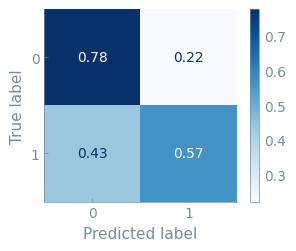

In [69]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_BET_confusionMatrix_50_50_size65_XGBoost.pdf', bbox_inches='tight')